In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
with open('p25_tauuo_thetao_zos.pkl', 'rb') as f:
    [lat_SAN, lat_SAS, lon_SAW, lon_SAE, lat_TSN, lat_TSS, lon_TSW, lon_TSE,
    tauuo_SA, thetao_SA, thetao_TS, zos_TS, plot_list] = \
    pickle.load(f)

print(plot_list)

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']


In [4]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/home/561/erd561/figures/CMIP5/'

hist_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/tauuo/latest/'
hist_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zos/latest/'
hist_uas_path = '/g/data/e14/erd561/CMIP5/banksia/hist_1980-1999/mon/atmos/uas/latest/'
hist_vas_path = '/g/data/e14/erd561/CMIP5/banksia/hist_1980-1999/mon/atmos/vas/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
hist_zos_list = sorted(os.listdir(hist_zos_path))
hist_uas_list = sorted(os.listdir(hist_uas_path))
hist_vas_list = sorted(os.listdir(hist_vas_path))

rcp85_thetao_path = '/g/data/e14/erd561/CMIP5/camelia/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/tauuo/latest/'
rcp85_zos_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zos/latest/'
rcp85_uas_path = '/g/data/e14/erd561/CMIP5/banksia/rcp85/mon/atmos/uas/latest/'
rcp85_vas_path = '/g/data/e14/erd561/CMIP5/banksia/rcp85/mon/atmos/vas/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
rcp85_zos_list = sorted(os.listdir(rcp85_zos_path))
rcp85_uas_list = sorted(os.listdir(rcp85_uas_path))
rcp85_vas_list = sorted(os.listdir(rcp85_vas_path))

hist_zossga_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zossga/latest/'
hist_zossga_list = sorted(os.listdir(hist_zossga_path))
hist_zostoga_path = '/g/data/e14/erd561/CMIP5/bromeliad/historical/mon/ocean/zostoga/latest/'
hist_zostoga_list = sorted(os.listdir(hist_zostoga_path))

rcp85_zossga_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zossga/latest/'
rcp85_zossga_list = sorted(os.listdir(rcp85_zossga_path))
rcp85_zostoga_path = '/g/data/e14/erd561/CMIP5/bromeliad/rcp85/mon/ocean/zostoga/latest/'
rcp85_zostoga_list = sorted(os.listdir(rcp85_zostoga_path))

good_list = []
thetao_hist_good_list = []
for hist_thetao in hist_thetao_list:
    if \
    any(hist_thetao[:-28] in hist_tauuo for hist_tauuo in hist_tauuo_list) and \
    any(hist_thetao[:-28] in hist_uas for hist_uas in hist_uas_list) and \
    any(hist_thetao[:-28] in hist_vas for hist_vas in hist_vas_list) and \
    any(hist_thetao[:-28] in rcp85_thetao for rcp85_thetao in rcp85_thetao_list) and \
    any(hist_thetao[:-28] in rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list) and \
    any(hist_thetao[:-28] in rcp85_uas for rcp85_uas in rcp85_uas_list) and \
    any(hist_thetao[:-28] in rcp85_vas for rcp85_vas in rcp85_vas_list):
        print(hist_thetao[:-29])
        thetao_hist_good_list.append(hist_thetao)
        good_list.append(hist_thetao[:-29])

tauuo_hist_good_list = []
zos_hist_good_list = []
thetao_rcp85_good_list = []
tauuo_rcp85_good_list = []
zos_rcp85_good_list = []
for good in good_list:
    tauuo_hist_good_list.append([
        hist_tauuo for hist_tauuo in hist_tauuo_list if hist_tauuo[:-23] in good + '_'][0])
    thetao_rcp85_good_list.append(
        [rcp85_thetao for rcp85_thetao in rcp85_thetao_list if rcp85_thetao[:-28] in good + '_'][0])
    tauuo_rcp85_good_list.append(
        [rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list if rcp85_tauuo[:-23] in good + '_'][0])
    if good not in ['GFDL-CM3', 'HadGEM2-AO']:
        zos_hist_good_list.append([
            hist_zos for hist_zos in hist_zos_list if hist_zos[:-23] in good + '_'][0])
        zos_rcp85_good_list.append(
            [rcp85_zos for rcp85_zos in rcp85_zos_list if rcp85_zos[:-23] in good + '_'][0])
    elif good == 'GFDL-CM3':
        zos_hist_good_list.append('GFDL-CM3')
        zos_rcp85_good_list.append('GFDL-CM3')
    elif good == 'HadGEM2-AO':
        zos_hist_good_list.append('HadGEM2-AO')
        zos_rcp85_good_list.append('HadGEM2-AO')
# print(zos_rcp85_good_list)
# print(thetao_rcp85_good_list)
# print(tauuo_rcp85_good_list)

print(zos_rcp85_good_list)

p26_updated_CMIP5_fig
ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MIROC5
MPI-ESM-LR
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
inmcm4
['ACCESS1-0_r1i1p1_2080-2099mean.nc', 'ACCESS1-3_r1i1p1_2080-2099mean.nc', 'CMCC-CMS_r1i1p1_2080-2099mean.nc', 'CMCC-CM_r1i1p1_2080-2099mean.nc', 'CNRM-CM5_r1i1p1_2080-2099mean.nc', 'CSIRO-Mk3-6-0_r1i1p1_2080-2099mean.nc', 'CanESM2_r1i1p1_2080-2099mean.nc', 'FGOALS-s2_r1i1p1_2080-2099mean.nc', 'GFDL-CM3', 'GFDL-ESM2G_r1i1p1_2080-2099mean.nc', 'GFDL-ESM2M_r1i1p1_2080-2099mean.nc', 'HadGEM2-AO', 'IPSL-CM5A-LR_r1i1p1_2080-2099mean.nc', 'IPSL-CM5A-MR_r1i1p1_2080-2099mean.nc', 'IPSL-CM5B-LR_r1i1p1_2080-2099mean.nc', 'MIROC-ESM-CHEM_r1i1p1_2080-2099mean.nc', 'MIROC-ESM_r1i1p1_2080-2099mean.nc', 'MIROC5_r1i1p1_2080-2099mean.nc', 'MPI-ESM-LR_r1i1p1_2080-2099mean.nc', 'MPI-ESM-MR_r1i1p1_2080-2099mean.nc', 'MRI-CGCM3_r1i1p1_2080-

In [5]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

zos_hist = {}
zos_rcp85 = {}
zos_anom = {}
zos_lat = {}
zos_lon = {}

zossga_hist = {}
zossga_rcp85 = {}

zostoga_hist = {}
zostoga_rcp85 = {}

plot_list = []
for (model_thetao_hist, model_tauuo_hist, model_zos_hist, 
     model_thetao_rcp85, model_tauuo_rcp85, model_zos_rcp85, model) \
in zip(thetao_hist_good_list, tauuo_hist_good_list, zos_hist_good_list, 
       thetao_rcp85_good_list, tauuo_rcp85_good_list, zos_rcp85_good_list, 
       good_list):
    print(model + '...')
    
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    # if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4', 'FIO-ESM', 'CESM1-WACCM']:
    if model in ['MIROC5', 'inmcm4', 'MPI-ESM-LR']:
        print('No.')
        continue
    
    plot_list.append(model)
    
    thetao_hist_data = xr.open_dataset(hist_thetao_path + model_thetao_hist, decode_times=False)
    thetao_rcp85_data = xr.open_dataset(rcp85_thetao_path + model_thetao_rcp85, decode_times=False)
    thetao_hist[model] = thetao_hist_data['thetao'][0,0,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model_tauuo_hist, decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model_tauuo_rcp85, decode_times=False)
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    
    if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                    'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                    'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        zos_hist_data = xr.open_dataset(hist_zos_path + model_zos_hist, decode_times=False)
        zos_rcp85_data = xr.open_dataset(rcp85_zos_path + model_zos_rcp85, decode_times=False)
        pre_pre_zos_hist = zos_hist_data['zos'][0,:,:]*100
        pre_pre_zos_rcp85 = zos_rcp85_data['zos'][0,:,:]*100
        if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
            pre_pre_zos_hist = pre_pre_zos_hist.where((pre_pre_zos_hist != 0), np.nan)
            pre_pre_zos_rcp85 = pre_pre_zos_rcp85.where((pre_pre_zos_rcp85 != 0), np.nan)
        pre_zos_hist = pre_pre_zos_hist - np.mean(pre_pre_zos_hist)
        pre_zos_rcp85 = pre_pre_zos_rcp85 - np.mean(pre_pre_zos_rcp85)

        zos_hist_plus_sga = 0
        zos_rcp85_plus_sga = 0
        zos_hist_plus_toga = 0
        zos_rcp85_plus_toga = 0
        for hist_zossga in hist_zossga_list:
            if model == hist_zossga[:-24]:
    #             print(hist_zossga[:-24])
                zossga_hist_data = xr.open_dataset(hist_zossga_path + hist_zossga, decode_times=False)
                zossga_hist[model] = zossga_hist_data['zossga'][0]*100
    #             print('hist zossga')
                zos_hist_plus_sga = 1

        for rcp85_zossga in rcp85_zossga_list:
            if model == rcp85_zossga[:-24]:
    #             print(rcp85_zossga[:-24])
                zossga_rcp85_data = xr.open_dataset(rcp85_zossga_path + rcp85_zossga, decode_times=False)
                zossga_rcp85[model] = zossga_rcp85_data['zossga'][0]*100
    #             print('rcp85 zossga')
                zos_rcp85_plus_sga = 1

        for hist_zostoga in hist_zostoga_list:
            if model == hist_zostoga[:-24]:
    #             print(hist_zostoga[:-24])
                zostoga_hist_data = xr.open_dataset(hist_zostoga_path + hist_zostoga, decode_times=False)
                zostoga_hist[model] = zostoga_hist_data['zostoga'][0]*100
    #             print('hist zostoga')
                zos_hist_plus_toga = 1

        for rcp85_zostoga in rcp85_zostoga_list:
            if model == rcp85_zostoga[:-24]:
    #             print(rcp85_zostoga[:-24])
                zostoga_rcp85_data = xr.open_dataset(rcp85_zostoga_path + rcp85_zostoga, decode_times=False)
                zostoga_rcp85[model] = zostoga_rcp85_data['zostoga'][0]*100
                zos_rcp85_plus_toga = 1
    #             print('rcp85 zostoga')

        if zos_hist_plus_sga == 1 and zos_rcp85_plus_sga == 1:
            print('ZOSSGA')
#             zos_hist[model] = pre_zos_hist + zossga_hist[model]
#             zos_rcp85[model] = pre_zos_rcp85 + zossga_rcp85[model]
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85

        elif zos_hist_plus_toga == 1 and zos_rcp85_plus_toga == 1:
            print('ZOSTOGA')
#             zos_hist[model] = pre_zos_hist + zostoga_hist[model]
#             zos_rcp85[model] = pre_zos_rcp85 + zostoga_rcp85[model]
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85

        else:
            print('NONE')
            zos_hist[model] = pre_zos_hist
            zos_rcp85[model] = pre_zos_rcp85 
            
        zos_anom[model] = zos_rcp85[model]-zos_hist[model]

    
    thetao_anom[model] = thetao_rcp85[model]-thetao_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
    
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
    
    if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                    'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                    'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        if len(zos_hist_data['lat'].shape) is 2:
            # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
            if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][-1,:]
            else:
                zos_lat[model] = zos_hist_data['lat'][:,0]
                zos_lon[model] = zos_hist_data['lon'][0,:]
        else:
            zos_lat[model] = zos_hist_data['lat'][:]
            zos_lon[model] = zos_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'bcc-csm1-1-m', 'bcc-csm1-1']:
        thetao_lon[model][0:280] += 360
        tauuo_lon[model][0:280] += 360
        
        if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                    'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                    'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
            zos_lon[model][0:280] += 360
    
#     # MPI-ESM-LR lon needs to be offset...
#     if model in ['MPI-ESM-LR']:
#         thetao_lon[model].roll(lon=100)
#         tauuo_lon[model].roll(i=100)
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_anom_now = thetao_anom[model]
        thetao_anom[model] = np.flipud(thetao_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        zos_anom_now = zos_anom[model]
        zos_anom[model] = np.flipud(zos_anom_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        zos_lat_now = zos_lat[model]
        zos_lat[model] = np.flipud(zos_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_anom[model] = thetao_anom[model].where((thetao_anom[model] != 0), np.nan)
        
    print('OK!')

    
print(plot_list)
print(len(plot_list))   
        

ACCESS1-0...
ZOSSGA
OK!
ACCESS1-3...
ZOSSGA
OK!
CMCC-CMS...
ZOSSGA
OK!
CMCC-CM...
ZOSSGA
OK!
CNRM-CM5...
ZOSSGA
OK!
CSIRO-Mk3-6-0...
ZOSTOGA
OK!
CanESM2...
ZOSSGA
OK!
FGOALS-s2...
OK!
GFDL-CM3...
OK!
GFDL-ESM2G...
OK!
GFDL-ESM2M...
OK!
HadGEM2-AO...
OK!
IPSL-CM5A-LR...
ZOSSGA
OK!
IPSL-CM5A-MR...
OK!
IPSL-CM5B-LR...
OK!
MIROC-ESM-CHEM...
ZOSSGA
OK!
MIROC-ESM...
ZOSSGA
OK!
MIROC5...
No.
MPI-ESM-LR...
No.
MPI-ESM-MR...
ZOSSGA
OK!
MRI-CGCM3...
OK!
MRI-ESM1...
OK!
NorESM1-M...
ZOSSGA
OK!
inmcm4...
No.
['ACCESS1-0', 'ACCESS1-3', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
21


In [6]:
lon_unique = np.arange(100,170)
lat_unique = np.arange(-60,-20)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

thetao_anom_unique = []
tauuo_anom_unique = []

for idx, t in enumerate(plot_list):
    print(t)
    
    thetao_lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
    thetao_lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
    thetao_lon_W_idx = find_nearest_index(thetao_lon[t], lon_W)
    thetao_lon_E_idx = find_nearest_index(thetao_lon[t], lon_E)
    thetao_grid_lon_now, thetao_grid_lat_now = np.meshgrid(
        thetao_lon[t][thetao_lon_W_idx:thetao_lon_E_idx], 
        thetao_lat[t][thetao_lat_S_idx:thetao_lat_N_idx])
    print(thetao_grid_lon_now.shape)
    print(thetao_grid_lat_now.shape)
    thetao_lon_flat = np.transpose(thetao_grid_lon_now.flatten('F'))
    thetao_lat_flat = thetao_grid_lat_now.flatten('F')
    thetao_flat_list = [thetao_lon_flat, thetao_lat_flat]    
    thetao_grid_points = np.transpose(thetao_flat_list)
    print(np.shape(thetao_grid_points))
    thetao_anom_now = thetao_anom[t][thetao_lat_S_idx:thetao_lat_N_idx,thetao_lon_W_idx:thetao_lon_E_idx]
    
    tauuo_lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    tauuo_lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    tauuo_lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    tauuo_lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    tauuo_grid_lon_now, tauuo_grid_lat_now = np.meshgrid(
        tauuo_lon[t][tauuo_lon_W_idx:tauuo_lon_E_idx], 
        tauuo_lat[t][tauuo_lat_S_idx:tauuo_lat_N_idx])
    tauuo_lon_flat = np.transpose(tauuo_grid_lon_now.flatten('F'))
    tauuo_lat_flat = tauuo_grid_lat_now.flatten('F')
    tauuo_flat_list = [tauuo_lon_flat, tauuo_lat_flat]    
    tauuo_grid_points = np.transpose(tauuo_flat_list)
    tauuo_anom_now = tauuo_anom[t][tauuo_lat_S_idx:tauuo_lat_N_idx,tauuo_lon_W_idx:tauuo_lon_E_idx]

    if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('lon', 'lat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('lon', 'lat'))
    elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('rlon', 'rlat'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('rlon', 'rlat'))
    elif t in ['MPI-ESM-MR']:
        thetao_anom_now_flatten = thetao_anom_now.flatten('F')
        tauuo_anom_now_flatten = tauuo_anom_now.flatten('F')
    else:
        thetao_anom_now_flatten = thetao_anom_now.stack(z=('i', 'j'))
        tauuo_anom_now_flatten = tauuo_anom_now.stack(z=('i', 'j'))
    
    print(np.shape(thetao_anom_now_flatten))
    
    thetao_anom_interp = interpolate.griddata(thetao_grid_points, thetao_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauuo_anom_interp = interpolate.griddata(tauuo_grid_points, tauuo_anom_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    if idx == 0:
        thetao_anom_unique = thetao_anom_interp
        tauuo_anom_unique = tauuo_anom_interp
    else:
        thetao_anom_unique = np.dstack((thetao_anom_unique, thetao_anom_interp))
        tauuo_anom_unique = np.dstack((tauuo_anom_unique, tauuo_anom_interp)) 
    
print(np.shape(thetao_anom_unique))
print(thetao_anom_unique)


(40, 70)
ACCESS1-0
(53, 76)
(53, 76)
(4028, 2)
(4028,)
ACCESS1-3
(53, 76)
(53, 76)
(4028, 2)
(4028,)
CMCC-CMS
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CMCC-CM
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CNRM-CM5
(65, 76)
(65, 76)
(4940, 2)
(4940,)
CSIRO-Mk3-6-0
(49, 40)
(49, 40)
(1960, 2)
(1960,)
CanESM2
(49, 55)
(49, 55)
(2695, 2)
(2695,)
FGOALS-s2
(46, 76)
(46, 76)
(3496, 2)
(3496,)
GFDL-CM3
(48, 76)
(48, 76)
(3648, 2)
(3648,)
GFDL-ESM2G
(47, 76)
(47, 76)
(3572, 2)
(3572,)
GFDL-ESM2M
(48, 76)
(48, 76)
(3648, 2)
(3648,)
HadGEM2-AO
(47, 76)
(47, 76)
(3572, 2)
(3572,)
IPSL-CM5A-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5A-MR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
IPSL-CM5B-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
MIROC-ESM-CHEM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MIROC-ESM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MPI-ESM-MR
(118, 169)
(118, 169)
(19942, 2)
(19942,)
MRI-CGCM3
(92, 76)
(92, 76)
(6992, 2)
(6992,)
MRI-ESM1
(92, 76)
(92, 76)
(6992, 2)
(6992,)
NorESM1-M
(94, 68)
(94, 68)
(6392, 2)
(6392,)
(40, 

In [7]:
lon_unique = np.arange(100,170)
lat_unique = np.arange(-60,-20)

grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

lat_N = -17
lat_S = -63
lon_W = 97
lon_E = 173

zos_anom_unique = []

for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                    'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                    'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        print(t)

        zos_lat_N_idx = find_nearest_index(zos_lat[t], lat_N)
        zos_lat_S_idx = find_nearest_index(zos_lat[t], lat_S)
        zos_lon_W_idx = find_nearest_index(zos_lon[t], lon_W)
        zos_lon_E_idx = find_nearest_index(zos_lon[t], lon_E)
        zos_grid_lon_now, zos_grid_lat_now = np.meshgrid(
            zos_lon[t][zos_lon_W_idx:zos_lon_E_idx], 
            zos_lat[t][zos_lat_S_idx:zos_lat_N_idx])
        print(zos_grid_lon_now.shape)
        print(zos_grid_lat_now.shape)
        zos_lon_flat = np.transpose(zos_grid_lon_now.flatten('F'))
        zos_lat_flat = zos_grid_lat_now.flatten('F')
        zos_flat_list = [zos_lon_flat, zos_lat_flat]    
        zos_grid_points = np.transpose(zos_flat_list)
        print(np.shape(zos_grid_points))
        zos_anom_now = zos_anom[t][zos_lat_S_idx:zos_lat_N_idx,zos_lon_W_idx:zos_lon_E_idx]

        if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
            zos_anom_now_flatten = zos_anom_now.stack(z=('lon', 'lat'))
        elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
            zos_anom_now_flatten = zos_anom_now.stack(z=('rlon', 'rlat'))
        elif t in ['MPI-ESM-MR']:
            zos_anom_now_flatten = zos_anom_now.flatten('F')
        else:
            zos_anom_now_flatten = zos_anom_now.stack(z=('i', 'j'))

        print(np.shape(zos_anom_now_flatten))

        zos_anom_interp = interpolate.griddata(zos_grid_points, zos_anom_now_flatten, 
                                               (grid_lon_unique, grid_lat_unique), 
                                               method='linear')
        if idx == 0:
            zos_anom_unique = zos_anom_interp
        else:
            zos_anom_unique = np.dstack((zos_anom_unique, zos_anom_interp))
    
print(np.shape(zos_anom_unique))
print(zos_anom_unique)



(40, 70)
ACCESS1-0
(53, 76)
(53, 76)
(4028, 2)
(4028,)
ACCESS1-3
(53, 76)
(53, 76)
(4028, 2)
(4028,)
CMCC-CMS
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CMCC-CM
(32, 38)
(32, 38)
(1216, 2)
(1216,)
CNRM-CM5
(65, 76)
(65, 76)
(4940, 2)
(4940,)
CSIRO-Mk3-6-0
(49, 40)
(49, 40)
(1960, 2)
(1960,)
CanESM2
(49, 55)
(49, 55)
(2695, 2)
(2695,)
IPSL-CM5A-LR
(32, 38)
(32, 38)
(1216, 2)
(1216,)
MIROC-ESM-CHEM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MIROC-ESM
(49, 55)
(49, 55)
(2695, 2)
(2695,)
MPI-ESM-MR
(118, 169)
(118, 169)
(19942, 2)
(19942,)
NorESM1-M
(94, 68)
(94, 68)
(6392, 2)
(6392,)
(40, 70, 12)
[[[-26.24286203 -24.01571585 -23.16731143 ... -16.14914749 -24.85893305
   -20.65651278]
  [-25.72342756 -24.88478062 -22.87222484 ... -15.95901852 -24.80167856
   -20.48171202]
  [-25.27228621 -25.76819584 -22.56489958 ... -15.14647665 -24.66336521
   -20.53624778]
  ...
  [-14.88603741 -10.64251238 -13.86286616 ... -27.00395512 -17.64092982
   -12.22236052]
  [-14.879264   -11.45743706 -13.21022761 ... -28.9

lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
lat: -30
lat: -29
lat: -28
lat: -27
lat: -26
lat: -25
lat: -24
lat: -23
lat: -22
lat: -21
(40, 70)


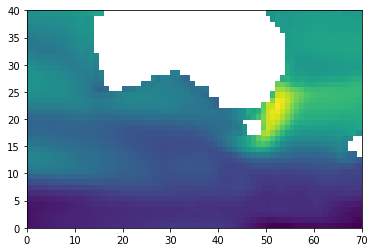

In [8]:
# Criteria for MMM:
good_tol = 12

thetao_anom_MMM = np.empty([40,70])
tauuo_anom_MMM = np.empty([40,70])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        thetao_unique_now = thetao_anom_unique[y_idx][x_idx]
        tauuo_unique_now = tauuo_anom_unique[y_idx][x_idx]
        #print(thetao_unique_now)
        #print(np.shape(thetao_unique_now))
        thetao_idx = np.argwhere(np.isnan(thetao_unique_now))
        tauuo_idx = np.argwhere(np.isnan(tauuo_unique_now))
        #print(idx)
        #print(len(idx))
        if len(thetao_idx) <= good_tol:
            thetao_anom_MMM[y_idx, x_idx] = np.nanmean(thetao_unique_now)
        else:
            thetao_anom_MMM[y_idx, x_idx] = np.mean(thetao_unique_now)
        if len(tauuo_idx) <= good_tol:
            tauuo_anom_MMM[y_idx, x_idx] = np.nanmean(tauuo_unique_now)
        else:
            tauuo_anom_MMM[y_idx, x_idx] = np.mean(tauuo_unique_now)

print(np.shape(thetao_anom_MMM))
plt.pcolor(thetao_anom_MMM)

lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
lat: -30
lat: -29
lat: -28
lat: -27
lat: -26
lat: -25
lat: -24
lat: -23
lat: -22
lat: -21
(40, 70)


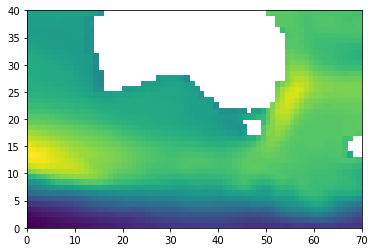

In [9]:
# Criteria for MMM:
good_tol = 6

zos_anom_MMM = np.empty([40,70])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        zos_unique_now = zos_anom_unique[y_idx][x_idx]
        #print(zos_unique_now)
        #print(np.shape(zos_unique_now))
        zos_idx = np.argwhere(np.isnan(zos_unique_now))
        #print(idx)
        #print(len(idx))
        if len(zos_idx) <= good_tol:
            zos_anom_MMM[y_idx, x_idx] = np.nanmean(zos_unique_now)
        else:
            zos_anom_MMM[y_idx, x_idx] = np.mean(zos_unique_now)

print(np.shape(zos_anom_MMM))
plt.pcolor(zos_anom_MMM)

In [10]:
# Calculate global SST anomaly:
global_MMM = {}
for model in plot_list:
    global_MMM[model] = np.nanmean(thetao_anom[model])
    
print(global_MMM)

{'ACCESS1-0': 2.6896484, 'ACCESS1-3': 2.75614, 'CMCC-CMS': 2.6834273, 'CMCC-CM': 2.5792053, 'CNRM-CM5': 2.5346916, 'CSIRO-Mk3-6-0': 2.409726, 'CanESM2': 2.9769533, 'FGOALS-s2': 3.256486, 'GFDL-CM3': 3.3988163, 'GFDL-ESM2G': 1.7988269, 'GFDL-ESM2M': 1.8187418, 'HadGEM2-AO': 2.8746197, 'IPSL-CM5A-LR': 2.9904785, 'IPSL-CM5A-MR': 2.892341, 'IPSL-CM5B-LR': 2.1574078, 'MIROC-ESM-CHEM': 3.5227914, 'MIROC-ESM': 3.3338687, 'MPI-ESM-MR': 2.2581325, 'MRI-CGCM3': 2.1594028, 'MRI-ESM1': 2.5726848, 'NorESM1-M': 1.9738988}


Bbox(x0=0.125, y0=0.6579411764705883, x1=0.29347826086956524, y1=0.88)
[0.125, 0.6879411764705883, 0.30347826086956525, 0.91]
Bbox(x0=0.3271739130434783, y0=0.6579411764705883, x1=0.6978260869565218, y1=0.88)
[0.3271739130434783, 0.6879411764705883, 0.6978260869565218, 0.91]
Bbox(x0=0.7315217391304348, y0=0.6579411764705883, x1=0.9000000000000001, y1=0.88)
[0.7215217391304348, 0.6879411764705883, 0.9000000000000001, 0.91]
Bbox(x0=0.125, y0=0.3914705882352941, x1=0.29347826086956524, y1=0.6135294117647059)
[0.125, 0.2614705882352941, 0.28347826086956524, 0.4835294117647059]
Bbox(x0=0.3271739130434783, y0=0.3914705882352941, x1=0.4956521739130435, y1=0.6135294117647059)
[0.3021739130434783, 0.2614705882352941, 0.4606521739130435, 0.4835294117647059]
Bbox(x0=0.7315217391304348, y0=0.3914705882352941, x1=0.9000000000000001, y1=0.6135294117647059)
[0.7415217391304348, 0.2614705882352941, 0.9000000000000001, 0.4835294117647059]
Bbox(x0=0.5293478260869566, y0=0.3914705882352941, x1=0.69782608

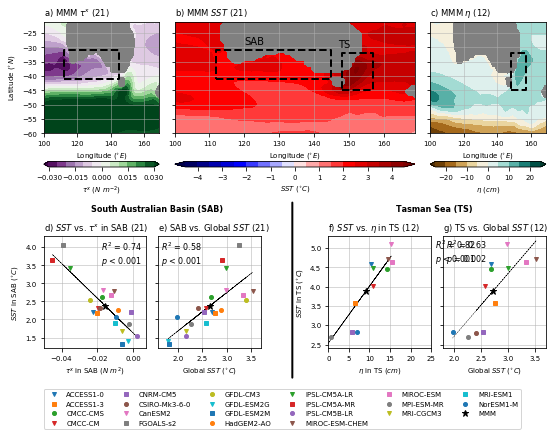

In [12]:
import scipy.stats as stats

def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

row = 3
col = 4
fig = plt.figure()
fig.set_size_inches(9,7)
matplotlib.rcParams.update({'font.size': 7}) 
marker = itertools.cycle(('v', 's', 'o')) 


##########################################################################################
ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.03, pos.x1+0.01, pos.y1+0.03] 
print(pos_plot)

levels = arange(-0.03,0.03,0.005)
plot = plt.contourf(lon_unique, lat_unique, tauuo_anom_MMM,
            cmap='PRGn', levels=levels, extend='both')
ax.set_position(bbox(pos_plot))

plt.plot(
    [lon_SAW,lon_SAE,lon_SAE,lon_SAW,lon_SAW], 
    [lat_SAS,lat_SAS,lat_SAN,lat_SAN,lat_SAS], 
    color='k', linestyle='--', linewidth=2)

ax.set_facecolor('gray')
ax.set_title(r'a) MMM $\tau^{x}$ (21)', loc='left')
plt.xlabel('Longitude ($^{\circ}E$)')
plt.xticks(arange(100,160,20))
plt.ylabel('Latitude ($^{\circ}N$)')
plt.yticks(arange(-60,-20,5))
plt.ylim([-60,-21])
plt.grid(linewidth=0.5)

axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.3, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='horizontal', 
                    ticks=[-0.03, -0.015, 0, 0.015, 0.03],
                    label=r'$\tau^{x}$ ($N\ m^{-2}$)', cax=axins)
##########################################################################################

plt.text(+0.4,-8,'South Australian Basin (SAB)',fontweight='bold', fontsize=8)
plt.text(+3.3,-8,'Tasman Sea (TS)' ,fontweight='bold', fontsize=8)
plt.annotate('', xy=(2.15, -6), xytext=(2.15, -38), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle="-", color='k', linestyle='-', linewidth=2))

# ##########################################################################################
ax = plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.03, pos.x1, pos.y1+0.03] 
print(pos_plot)

levels = arange(-4.5,4.5,0.5)    
plot = plt.contourf(lon_unique, lat_unique, thetao_anom_MMM,
            cmap='seismic', levels=levels, extend='both')
ax.set_position(bbox(pos_plot))

plt.text(120,-29,'SAB',color='k',fontsize=10)
plt.text(147,-30,'TS',color='k',fontsize=10)
plt.plot(
    [lon_SAW,lon_SAE,lon_SAE,lon_SAW,lon_SAW], 
    [lat_SAS,lat_SAS,lat_SAN,lat_SAN,lat_SAS], 
    color='k', linestyle='--', linewidth=2)
plt.plot(
    [lon_TSW,lon_TSE,lon_TSE,lon_TSW,lon_TSW], 
    [lat_TSS,lat_TSS,lat_TSN,lat_TSN,lat_TSS],
    color='k', linestyle='--', linewidth=2)

ax.set_facecolor('gray')
plt.title(r'b) MMM $SST$ (21)', loc='left')
plt.xlabel('Longitude ($^{\circ}E$)')
plt.xticks(arange(100,160,10))
# plt.ylabel('Latitude ($^{\circ}N$)')
plt.gca().set_yticklabels('')
plt.yticks(arange(-60,-20,5))
plt.ylim([-60,-21])
plt.grid(linewidth=0.5)

axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.3, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='horizontal',
                    label=r'$SST$ ($^{\circ}C$)', cax=axins)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (0, 3), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0-0.01, pos.y0+0.03, pos.x1, pos.y1+0.03] 
print(pos_plot)

levels = arange(-25,25,5)
plot = plt.contourf(lon_unique, lat_unique, zos_anom_MMM,
            cmap='BrBG', levels=levels, extend='both')
ax.set_position(bbox(pos_plot))

plt.plot(
    [lon_TSW,lon_TSE,lon_TSE,lon_TSW,lon_TSW], 
    [lat_TSS,lat_TSS,lat_TSN,lat_TSN,lat_TSS], 
    color='k', linestyle='--', linewidth=2)

ax.set_facecolor('gray')
plt.title(r'c) MMM $\eta$ (12)', loc='left')
plt.xlabel('Longitude ($^{\circ}E$)')
plt.xticks(arange(100,160,20))
# plt.ylabel('Latitude ($^{\circ}N$)')
plt.gca().set_yticklabels('')
plt.yticks(arange(-60,-20,5))
plt.ylim([-60,-21])
plt.grid(linewidth=0.5)

axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.3, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='horizontal',
                    label=r'$\eta$ ($cm$)', cax=axins)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (1, 0), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.13, pos.x1-0.01, pos.y1-0.13] 
print(pos_plot)

tauuo_SA_values = list(tauuo_SA.values())
thetao_SA_values = list(thetao_SA.values())
tauuo_SA_values_mean = np.nanmean(tauuo_SA_values)
thetao_SA_values_mean = np.nanmean(thetao_SA_values)
fit = np.polyfit(tauuo_SA_values, thetao_SA_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(tauuo_SA_values, fit_fn(tauuo_SA_values), '--k',
        linewidth=0.5)
ax.set_position(bbox(pos_plot))
for idx, t in enumerate(plot_list):    
    plt.plot(tauuo_SA[t], thetao_SA[t], 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(tauuo_SA_values_mean, thetao_SA_values_mean ,
         marker = '*', markersize=7 ,linestyle='', color='k')
# R2 = np.corrcoef(tauuo_SA_values, thetao_SA_values)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(tauuo_SA_values, thetao_SA_values)
plt.title(r'd) $SST$ vs. $\tau^{x}$ in SAB'
          + ' (21)', loc='left')
plt.xlabel(r'$\tau^{x}$ in SAB ($N\ m^{2}$)')
plt.ylabel('$SST$ in SAB ($^{\circ}C$)')
plt.xlim([-0.05, 0.0075])
plt.ylim([1.2, 4.3])
plt.grid(linewidth=0.5)
# plt.text(-0.018, 3.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
plt.text(-0.018, 3.5, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ < 0.001', fontsize=8)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (1, 1), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0-0.025, pos.y0-0.13, pos.x1-0.035, pos.y1-0.13] 
print(pos_plot)

thetao_global_MMM_values = list(global_MMM.values())
thetao_global_MMM_values_mean = np.nanmean(thetao_global_MMM_values)
fit = np.polyfit(thetao_global_MMM_values, thetao_SA_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(thetao_global_MMM_values, fit_fn(thetao_global_MMM_values), '--k',
         linewidth=0.5, label='_nolegend_')
ax.set_position(bbox(pos_plot))
for idx, t in enumerate(plot_list):    
    plt.plot(global_MMM[t] ,thetao_SA[t] , 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(thetao_global_MMM_values_mean, thetao_SA_values_mean,
         marker = '*', markersize=7 ,linestyle='', color='k')
# R2 = np.corrcoef(thetao_global_MMM_values, thetao_SA_values)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(thetao_global_MMM_values, thetao_SA_values)
plt.title('e) SAB vs. Global $SST$'
          + ' (21)', loc='left')
plt.xlabel('Global $SST$ ($^{\circ}C$)')
plt.ylabel('$SST$ in SAB ($^{\circ}C$)')
plt.ylim([1.2, 4.3])
plt.grid(linewidth=0.5)
plt.xticks(arange(1.5,4,0.5))
plt.xlim([1.6, 3.7])
plt.ylabel('')
plt.gca().set_yticklabels('')
# plt.text(1.65, 3.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
plt.text(1.65, 3.5, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ < 0.001', fontsize=8)

# for idx, t in enumerate(plot_list):    
#     plt.plot(tauuo_SA[t], thetao_SA[t],
#              marker = next(marker), markersize=4 ,linestyle='')
# plt.plot(tauuo_SA_values_mean, thetao_SA_values_mean ,
#          marker = '*', markersize=5 ,linestyle='', color='k')
plot_list_legend = plot_list[:]
plot_list_legend.append('MMM')
lgd = plt.legend(plot_list_legend, loc='lower left', ncol=6,
                bbox_to_anchor=(-1.15, -0.75, 1, 1))
# lgd.get_texts()[8].set_color('gray')
# lgd.get_texts()[11].set_color('gray')
# lgd.get_texts()[7].set_color('gray')
# lgd.get_texts()[9].set_color('gray')
# lgd.get_texts()[10].set_color('gray')
# lgd.get_texts()[13].set_color('gray')
# lgd.get_texts()[14].set_color('gray')
# lgd.get_texts()[18].set_color('gray')
# lgd.get_texts()[19].set_color('gray')
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (1, 3), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.01, pos.y0-0.13, pos.x1, pos.y1-0.13]
print(pos_plot)

thetao_TS_reduced = []
zos_TS_reduced = []
global_reduced = []
for idx, model in enumerate(plot_list):
    if model not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        thetao_TS_reduced.append(thetao_TS[model])
        zos_TS_reduced.append(zos_TS[model])
        global_reduced.append(global_MMM[model])
zos_TS_reduced_mean = np.nanmean(zos_TS_reduced)
thetao_TS_reduced_mean = np.nanmean(thetao_TS_reduced)
global_reduced_mean = np.nanmean(global_reduced)
# print(len(zos_TS_reduced))
# print(len(thetao_TS_reduced))
# print(len(global_reduced))
fit = np.polyfit(global_reduced, thetao_TS_reduced, 1)
fit_fn = np.poly1d(fit)
plt.plot(global_reduced, fit_fn(global_reduced), '--k',
         linewidth=0.5)
count = -1
for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        count += 1
        plt.plot(global_reduced[count], thetao_TS_reduced[count], 
                 marker = next(marker), markersize=4 ,linestyle='')
    else:
        plt.plot(global_reduced_mean, fit_fn(global_reduced_mean) , 
                     marker = next(marker), markersize=1 ,linestyle='')
        
plt.plot(global_reduced_mean, thetao_TS_reduced_mean ,
         marker = '*', markersize=7 ,linestyle='', color='k')
ax.set_position(bbox(pos_plot))
# R2 = np.corrcoef(global_reduced, thetao_TS_reduced)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(global_reduced, thetao_TS_reduced)
plt.title(r'g) TS vs. Global $SST$'
          + ' (12)', loc='left')
plt.xlabel('Global $SST$ ($^{\circ}C$)')
plt.ylabel('$SST$ in TS ($^{\circ}C$)')
plt.xlim([1.8, 3.7])
plt.ylim([2.4, 5.3])
plt.gca().set_yticklabels('')
plt.grid(linewidth=0.5)
# plt.text(1.9, 4.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
plt.text(1.85, 4.6, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ = ' + str(np.round(p_value*1000)/1000), fontsize=8)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (1, 2), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.035, pos.y0-0.13, pos.x1+0.025, pos.y1-0.13] 
print(pos_plot)

fit = np.polyfit(zos_TS_reduced, thetao_TS_reduced, 1)
fit_fn = np.poly1d(fit)
plt.plot(zos_TS_reduced, fit_fn(zos_TS_reduced), '--k', 
         linewidth=0.5)
count = -1
for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        count += 1
        plt.plot(zos_TS_reduced[count], thetao_TS_reduced[count], 
                 marker = next(marker), markersize=4 ,linestyle='')
    else:
        plt.plot(zos_TS_reduced_mean, fit_fn(zos_TS_reduced_mean) , 
                     marker = next(marker), markersize=1 ,linestyle='')
plt.plot(zos_TS_reduced_mean, thetao_TS_reduced_mean,
         marker = '*', markersize=7 ,linestyle='', color='k')
ax.set_position(bbox(pos_plot))
# R2 = np.corrcoef(zos_TS_reduced, thetao_TS_reduced)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(zos_TS_reduced, thetao_TS_reduced)
plt.title(r'f) $SST$ vs. $\eta$ in TS'
          + ' (12)', loc='left')
plt.xlabel(r'$\eta$ in TS ($cm$)')
plt.ylabel('$SST$ in TS ($^{\circ}C$)')
plt.xlim([0, 25])
plt.ylim([2.4, 5.3])
plt.xticks(arange(0,25,5))
plt.grid(linewidth=0.5)
# plt.ylabel('')
# plt.gca().set_yticklabels('')
plt.text(25.9, 4.6, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ < 0.001', fontsize=8)
# ##########################################################################################


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig2_' + '.png', bbox_inches='tight', dpi=300)

Bbox(x0=0.125, y0=0.6579411764705883, x1=0.29347826086956524, y1=0.88)
[0.115, 0.6879411764705883, 0.29347826086956524, 0.91]
Bbox(x0=0.5293478260869566, y0=0.6579411764705883, x1=0.6978260869565218, y1=0.88)
[0.6293478260869566, 0.6879411764705883, 0.6978260869565218, 0.91]
Bbox(x0=0.3271739130434783, y0=0.6579411764705883, x1=0.4956521739130435, y1=0.88)
[0.3771739130434783, 0.6879411764705883, 0.5556521739130436, 0.91]


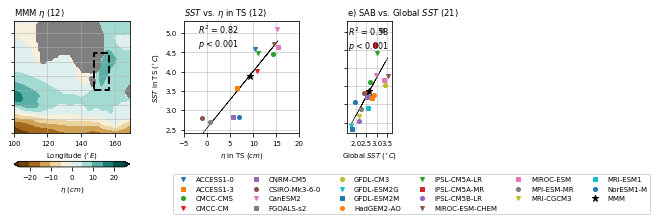

In [28]:
import scipy.stats as stats

def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

row = 3
col = 4
fig = plt.figure()
fig.set_size_inches(9,7)
matplotlib.rcParams.update({'font.size': 7}) 
marker = itertools.cycle(('v', 's', 'o')) 


##########################################################################################
# ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.03, pos.x1+0.01, pos.y1+0.03] 
# print(pos_plot)

# levels = arange(-0.03,0.03,0.005)
# plot = plt.contourf(lon_unique, lat_unique, tauuo_anom_MMM,
#             cmap='PRGn', levels=levels, extend='both')
# ax.set_position(bbox(pos_plot))

# plt.plot(
#     [lon_SAW,lon_SAE,lon_SAE,lon_SAW,lon_SAW], 
#     [lat_SAS,lat_SAS,lat_SAN,lat_SAN,lat_SAS], 
#     color='k', linestyle='--', linewidth=2)

# ax.set_facecolor('gray')
# ax.set_title(r'a) MMM $\tau^{x}$ (21)', loc='left')
# plt.xlabel('Longitude ($^{\circ}E$)')
# plt.xticks(arange(100,160,20))
# plt.ylabel('Latitude ($^{\circ}N$)')
# plt.yticks(arange(-60,-20,5))
# plt.ylim([-60,-21])
# plt.grid(linewidth=0.5)

# axins = inset_axes(ax,
#                    width="100%",  # width = 5% of parent_bbox width
#                    height="5%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(0, -0.3, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='horizontal', 
#                     ticks=[-0.03, -0.015, 0, 0.015, 0.03],
#                     label=r'$\tau^{x}$ ($N\ m^{-2}$)', cax=axins)
##########################################################################################

# plt.text(+0.4,-8,'South Australian Basin (SAB)',fontweight='bold', fontsize=8)
# plt.text(+3.3,-8,'Tasman Sea (TS)' ,fontweight='bold', fontsize=8)
# plt.annotate('', xy=(2.15, -6), xytext=(2.15, -38), xycoords='axes fraction', 
#             arrowprops=dict(arrowstyle="-", color='k', linestyle='-', linewidth=2))

# ##########################################################################################
# ax = plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=2)
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.03, pos.x1, pos.y1+0.03] 
# print(pos_plot)

# levels = arange(-4.5,4.5,0.5)    
# plot = plt.contourf(lon_unique, lat_unique, thetao_anom_MMM,
#             cmap='seismic', levels=levels, extend='both')
# ax.set_position(bbox(pos_plot))

# plt.text(120,-29,'SAB',color='k',fontsize=10)
# plt.text(147,-30,'TS',color='k',fontsize=10)
# plt.plot(
#     [lon_SAW,lon_SAE,lon_SAE,lon_SAW,lon_SAW], 
#     [lat_SAS,lat_SAS,lat_SAN,lat_SAN,lat_SAS], 
#     color='k', linestyle='--', linewidth=2)
# plt.plot(
#     [lon_TSW,lon_TSE,lon_TSE,lon_TSW,lon_TSW], 
#     [lat_TSS,lat_TSS,lat_TSN,lat_TSN,lat_TSS],
#     color='k', linestyle='--', linewidth=2)

# ax.set_facecolor('gray')
# plt.title(r'b) MMM $SST$ (21)', loc='left')
# plt.xlabel('Longitude ($^{\circ}E$)')
# plt.xticks(arange(100,160,10))
# # plt.ylabel('Latitude ($^{\circ}N$)')
# plt.gca().set_yticklabels('')
# plt.yticks(arange(-60,-20,5))
# plt.ylim([-60,-21])
# plt.grid(linewidth=0.5)

# axins = inset_axes(ax,
#                    width="100%",  # width = 5% of parent_bbox width
#                    height="5%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(0, -0.3, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='horizontal',
#                     label=r'$SST$ ($^{\circ}C$)', cax=axins)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (0, 0), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0-0.01, pos.y0+0.03, pos.x1, pos.y1+0.03] 
print(pos_plot)

levels = arange(-25,25,5)
plot = plt.contourf(lon_unique, lat_unique, zos_anom_MMM,
            cmap='BrBG', levels=levels, extend='both')
ax.set_position(bbox(pos_plot))

plt.plot(
    [lon_TSW,lon_TSE,lon_TSE,lon_TSW,lon_TSW], 
    [lat_TSS,lat_TSS,lat_TSN,lat_TSN,lat_TSS], 
    color='k', linestyle='--', linewidth=2)

ax.set_facecolor('gray')
plt.title(r'MMM $\eta$ (12)', loc='left')
plt.xlabel('Longitude ($^{\circ}E$)')
plt.xticks(arange(100,160,20))
# plt.ylabel('Latitude ($^{\circ}N$)')
plt.gca().set_yticklabels('')
plt.yticks(arange(-60,-20,5))
plt.ylim([-60,-21])
plt.grid(linewidth=0.5)

axins = inset_axes(ax,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.3, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='horizontal',
                    label=r'$\eta$ ($cm$)', cax=axins)
# ##########################################################################################


# ##########################################################################################
# ax = plt.subplot2grid((row, col), (1, 0), rowspan=1, colspan=1)
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0-0.13, pos.x1-0.01, pos.y1-0.13] 
# print(pos_plot)

# tauuo_SA_values = list(tauuo_SA.values())
# thetao_SA_values = list(thetao_SA.values())
# tauuo_SA_values_mean = np.nanmean(tauuo_SA_values)
# thetao_SA_values_mean = np.nanmean(thetao_SA_values)
# fit = np.polyfit(tauuo_SA_values, thetao_SA_values, 1)
# fit_fn = np.poly1d(fit) 
# plt.plot(tauuo_SA_values, fit_fn(tauuo_SA_values), '--k',
#         linewidth=0.5)
# ax.set_position(bbox(pos_plot))
# for idx, t in enumerate(plot_list):    
#     plt.plot(tauuo_SA[t], thetao_SA[t], 
#              marker = next(marker), markersize=4 ,linestyle='')
# plt.plot(tauuo_SA_values_mean, thetao_SA_values_mean ,
#          marker = '*', markersize=7 ,linestyle='', color='k')
# # R2 = np.corrcoef(tauuo_SA_values, thetao_SA_values)[0, 1]**2
# _, _, r_value, p_value, _ = stats.linregress(tauuo_SA_values, thetao_SA_values)
# plt.title(r'd) $SST$ vs. $\tau^{x}$ in SAB'
#           + ' (21)', loc='left')
# plt.xlabel(r'$\tau^{x}$ in SAB ($N\ m^{2}$)')
# plt.ylabel('$SST$ in SAB ($^{\circ}C$)')
# plt.xlim([-0.05, 0.0075])
# plt.ylim([1.2, 4.3])
# plt.grid(linewidth=0.5)
# # plt.text(-0.018, 3.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
# plt.text(-0.018, 3.5, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
#          '$p$ < 0.001', fontsize=8)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (0, 2), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.1, pos.y0+0.03, pos.x1, pos.y1+0.03] 
print(pos_plot)

thetao_global_MMM_values = list(global_MMM.values())
thetao_global_MMM_values_mean = np.nanmean(thetao_global_MMM_values)
fit = np.polyfit(thetao_global_MMM_values, thetao_SA_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(thetao_global_MMM_values, fit_fn(thetao_global_MMM_values), '--k',
         linewidth=0.5, label='_nolegend_')
ax.set_position(bbox(pos_plot))
for idx, t in enumerate(plot_list):    
    plt.plot(global_MMM[t] ,thetao_SA[t] , 
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(thetao_global_MMM_values_mean, thetao_SA_values_mean,
         marker = '*', markersize=7 ,linestyle='', color='k')
# R2 = np.corrcoef(thetao_global_MMM_values, thetao_SA_values)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(thetao_global_MMM_values, thetao_SA_values)
plt.title('e) SAB vs. Global $SST$'
          + ' (21)', loc='left')
plt.xlabel('Global $SST$ ($^{\circ}C$)')
plt.ylabel('$SST$ in SAB ($^{\circ}C$)')
plt.ylim([1.2, 4.3])
plt.grid(linewidth=0.5)
plt.xticks(arange(1.5,4,0.5))
plt.xlim([1.6, 3.7])
plt.ylabel('')
plt.gca().set_yticklabels('')
# plt.text(1.65, 3.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
plt.text(1.65, 3.5, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ < 0.001', fontsize=8)

for idx, t in enumerate(plot_list):    
    plt.plot(tauuo_SA[t], thetao_SA[t],
             marker = next(marker), markersize=4 ,linestyle='')
plt.plot(tauuo_SA_values_mean, thetao_SA_values_mean ,
         marker = '*', markersize=5 ,linestyle='', color='k')
plot_list_legend = plot_list[:]
plot_list_legend.append('MMM')
lgd = plt.legend(plot_list_legend, loc='lower left', ncol=6,
                bbox_to_anchor=(-4, -0.75, 1, 1))
# ##########################################################################################


# ##########################################################################################
# ax = plt.subplot2grid((row, col), (1, 3), rowspan=1, colspan=1)
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.01, pos.y0-0.13, pos.x1, pos.y1-0.13]
# print(pos_plot)

# thetao_TS_reduced = []
# zos_TS_reduced = []
# global_reduced = []
# for idx, model in enumerate(plot_list):
#     if model not in ['GFDL-CM3', 'HadGEM2-AO', 
#                 'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
#                 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
#         thetao_TS_reduced.append(thetao_TS[model])
#         zos_TS_reduced.append(zos_TS[model])
#         global_reduced.append(global_MMM[model])
# zos_TS_reduced_mean = np.nanmean(zos_TS_reduced)
# thetao_TS_reduced_mean = np.nanmean(thetao_TS_reduced)
# global_reduced_mean = np.nanmean(global_reduced)
# # print(len(zos_TS_reduced))
# # print(len(thetao_TS_reduced))
# # print(len(global_reduced))
# fit = np.polyfit(global_reduced, thetao_TS_reduced, 1)
# fit_fn = np.poly1d(fit)
# plt.plot(global_reduced, fit_fn(global_reduced), '--k',
#          linewidth=0.5)
# count = -1
# for idx, t in enumerate(plot_list):
#     if t not in ['GFDL-CM3', 'HadGEM2-AO', 
#                 'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
#                 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
#         count += 1
#         plt.plot(global_reduced[count], thetao_TS_reduced[count], 
#                  marker = next(marker), markersize=4 ,linestyle='')
#     else:
#         plt.plot(global_reduced_mean, fit_fn(global_reduced_mean) , 
#                      marker = next(marker), markersize=1 ,linestyle='')
        
# plt.plot(global_reduced_mean, thetao_TS_reduced_mean ,
#          marker = '*', markersize=7 ,linestyle='', color='k')
# ax.set_position(bbox(pos_plot))
# # R2 = np.corrcoef(global_reduced, thetao_TS_reduced)[0, 1]**2
# _, _, r_value, p_value, _ = stats.linregress(global_reduced, thetao_TS_reduced)
# plt.title(r'g) TS vs. Global $SST$'
#           + ' (12)', loc='left')
# plt.xlabel('Global $SST$ ($^{\circ}C$)')
# plt.ylabel('$SST$ in TS ($^{\circ}C$)')
# plt.xlim([1.8, 3.7])
# plt.ylim([2.4, 5.3])
# plt.gca().set_yticklabels('')
# plt.grid(linewidth=0.5)
# # plt.text(1.9, 4.8, '$R^2$ = ' + str(np.round(R2*100)/100), fontsize=8)
# plt.text(1.85, 4.6, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
#          '$p$ = ' + str(np.round(p_value*1000)/1000), fontsize=8)
# ##########################################################################################


# ##########################################################################################
ax = plt.subplot2grid((row, col), (0, 1), rowspan=1, colspan=1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.05, pos.y0+0.03, pos.x1+0.06, pos.y1+0.03] 
print(pos_plot)

fit = np.polyfit(zos_TS_reduced, thetao_TS_reduced, 1)
fit_fn = np.poly1d(fit)
plt.plot(zos_TS_reduced, fit_fn(zos_TS_reduced), '--k', 
         linewidth=0.5)
count = -1
for idx, t in enumerate(plot_list):
    if t not in ['GFDL-CM3', 'HadGEM2-AO', 
                'FGOALS-s2', 'GFDL-ESM2G', 'GFDL-ESM2M', 
                'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MRI-CGCM3', 'MRI-ESM1']:
        count += 1
        plt.plot(zos_TS_reduced[count], thetao_TS_reduced[count], 
                 marker = next(marker), markersize=4 ,linestyle='')
    else:
        plt.plot(zos_TS_reduced_mean, fit_fn(zos_TS_reduced_mean) , 
                     marker = next(marker), markersize=1 ,linestyle='')
plt.plot(zos_TS_reduced_mean, thetao_TS_reduced_mean,
         marker = '*', markersize=7 ,linestyle='', color='k')
ax.set_position(bbox(pos_plot))
# R2 = np.corrcoef(zos_TS_reduced, thetao_TS_reduced)[0, 1]**2
_, _, r_value, p_value, _ = stats.linregress(zos_TS_reduced, thetao_TS_reduced)
plt.title(r'$SST$ vs. $\eta$ in TS'
          + ' (12)', loc='left')
plt.xlabel(r'$\eta$ in TS ($cm$)')
plt.ylabel('$SST$ in TS ($^{\circ}C$)')
plt.xlim([-5, 20])
plt.ylim([2.4, 5.3])
plt.xticks(arange(-5,20,5))
plt.grid(linewidth=0.5)
# plt.ylabel('')
# plt.gca().set_yticklabels('')
plt.text(-2, 4.6, '$R^2$ = ' + str(np.round(r_value**2*100)/100) + '\n' + 
         '$p$ < 0.001', fontsize=8)
# ##########################################################################################


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_forZhang' + '.png', bbox_inches='tight', dpi=300)